This data analysis is on a dataset from Data Camp which is centered on data gotten from chocolate bars from different country of origin, stating the bar name, bean origin,cocopa percent, ratings, reviews, amongst others.


First, we import our packages to use

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import dateutil.parser

pd.set_option('display.max_columns', 15)
pd.set_option('expand_frame_repr', True)

sns.set_palette('hls')
%matplotlib inline

Lets read in the data

In [3]:
chocolate_bars = pd.read_csv('chocolate_bars.csv', index_col= 'id', parse_dates=True)
chocolate_bars

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00


Lets now clean our data; checking the info, missing values and duplicates, lets drop the missing values, duplicates and check the measures of central tendency

In [3]:
chocolate_bars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530 entries, 2454 to 2170
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      2530 non-null   object 
 1   company_location  2530 non-null   object 
 2   year_reviewed     2530 non-null   int64  
 3   bean_origin       2530 non-null   object 
 4   bar_name          2530 non-null   object 
 5   cocoa_percent     2530 non-null   float64
 6   num_ingredients   2443 non-null   float64
 7   ingredients       2443 non-null   object 
 8   review            2530 non-null   object 
 9   rating            2530 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 217.4+ KB


In [4]:
#dropping the missing values
cb1= chocolate_bars.dropna()
cb1

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00


In [19]:
#dropping the duplicates as well
cb2= cb1.drop_duplicates()
cb2

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00


Our data is better now, no more missing values and duplicates. We can now use this data to gain insights

In [8]:
#checking the measures of central tendecies to see what we can depict from our data
cb2.describe()

,year_reviewed,cocoa_percent,num_ingredients,rating
count,2443.000000,2443.000000,2443.000000,2443.00000
mean,2014.485878,71.496725,3.041343,3.21009
std,3.957507,5.156974,0.913728,0.42837
min,2006.000000,42.000000,1.000000,1.00000
25%,2012.000000,70.000000,2.000000,3.00000
50%,2015.000000,70.000000,3.000000,3.25000
75%,2018.000000,74.000000,4.000000,3.50000
max,2021.000000,100.000000,6.000000,4.00000


In [9]:
#checking for the categorical data as well
cd=cb2.dtypes[cb2.dtypes=='object'].index
cb2[cd].describe()

,manufacturer,company_location,bean_origin,bar_name,ingredients,review
count,2443,2443,2443,2443,2443,2443
unique,542,67,62,1567,21,2403
top,Soma,U.S.A.,Venezuela,Madagascar,"B,S,C","spicy, cocoa"
freq,56,1118,246,52,999,4


Now,lets answer the questions

In [12]:
#1; Average rating by country of origin; we use 'groupby' here
avr= cb2.groupby('bean_origin').rating.mean()
avr

bean_origin
Australia    3.250000
Belize       3.243243
Blend        3.085069
Bolivia      3.180380
Brazil       3.259740
               ...   
U.S.A.       3.217742
Uganda       3.097222
Vanuatu      3.062500
Venezuela    3.239837
Vietnam      3.287671
Name: rating, Length: 62, dtype: float64

In [14]:
#to reset the index, morelike to make the outpt a dataframe to aid plots
avr2=avr.reset_index()
avr2

,bean_origin,rating
0,Australia,3.250000
1,Belize,3.243243
2,Blend,3.085069
3,Bolivia,3.180380
4,Brazil,3.259740
...,...,...
57,U.S.A.,3.217742
58,Uganda,3.097222
59,Vanuatu,3.062500
60,Venezuela,3.239837


In [64]:
#2; Bars reviewed by country
bars_reviewed= cb2.groupby('bean_origin').bar_name.count()
bars_reviewed

bean_origin
Australia      3
Belize        74
Blend        144
Bolivia       79
Brazil        77
            ... 
U.S.A.        31
Uganda        18
Vanuatu       12
Venezuela    246
Vietnam       73
Name: bar_name, Length: 62, dtype: int64

In [65]:
#we also reset index here to allow for easy plots
bars_reviewed2= cb2.groupby('bean_origin').bar_name.count().reset_index()
bars_reviewed2

,bean_origin,bar_name
0,Australia,3
1,Belize,74
2,Blend,144
3,Bolivia,79
4,Brazil,77
...,...,...
57,U.S.A.,31
58,Uganda,18
59,Vanuatu,12
60,Venezuela,246


In [66]:
bars_reviewed2.rename(columns={'bar_name':'total_bars'},inplace=True)
bars_reviewed2

,bean_origin,total_bars
0,Australia,3
1,Belize,74
2,Blend,144
3,Bolivia,79
4,Brazil,77
...,...,...
57,U.S.A.,31
58,Uganda,18
59,Vanuatu,12
60,Venezuela,246


<AxesSubplot:title={'center':'Average ratings of country'}, xlabel='bean_origin', ylabel='rating'>

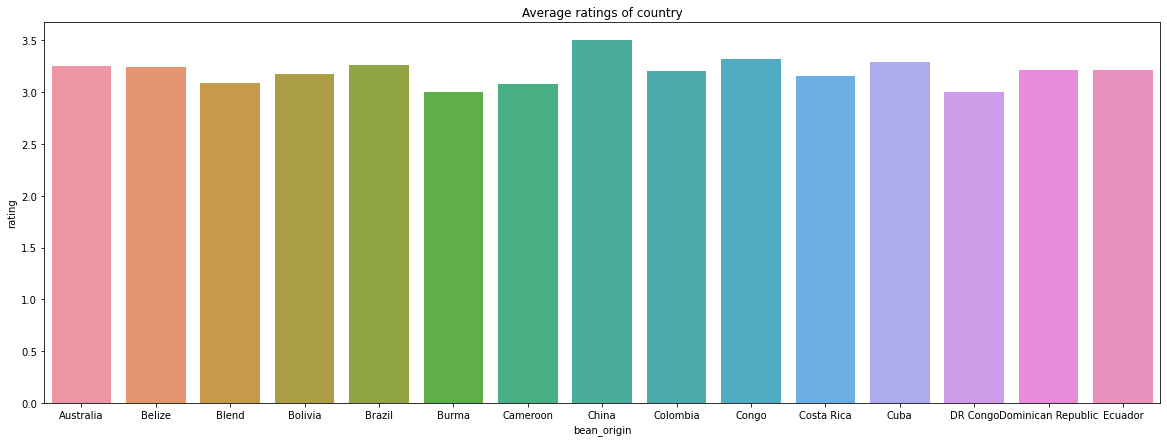

In [67]:
#3: Graph for question 1
plt.figure(figsize=(20,7))
plt.title('Average ratings of country')
sns.barplot(x='bean_origin', y='rating', data=avr2[0:15])

<AxesSubplot:title={'center':'Bars reviewed per country'}, xlabel='bean_origin', ylabel='total_bars'>

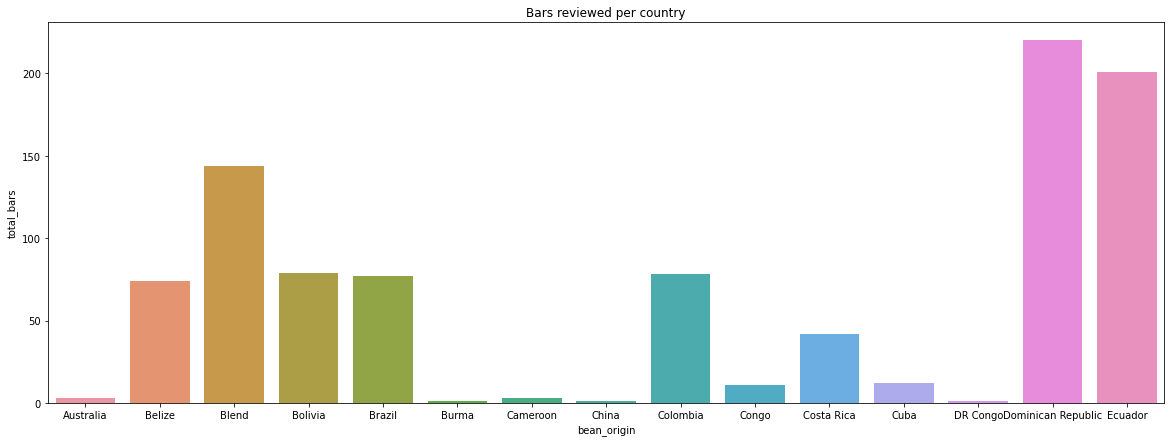

In [68]:
#3b; Graph for question 2
plt.figure(figsize=(20,7))
plt.title('Bars reviewed per country')
sns.barplot(x='bean_origin', y='total_bars', data=bars_reviewed2[0:15])

To check for the quality of the chocolate bars, the cocoa percent and the rating could be said to inform the quality. However, it is pertinent to check the relationship between these two variables to know if they can be used independently of each other. Since the whole data cannot be used at once, we will extract the chocolate bars with higher ratings (rating > 3.5) or with higher cocoa percentage ( cocoa_percent >=75%) to determine this correlation.

In [28]:
#4; cocoa bean origin an indicator for quality?
#extracting chocolate bars with a rating above 3.5
cbr= cb2.loc[(cb2.rating > 3.5)]
cbr

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
1011,A. Morin,France,2013,Ecuador,Equateur,70.0,4.0,"B,S,C,L","sandy, nutty, cocoa, fig",3.75
1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.0,"B,S,C,L","oily, nut, caramel, raspberry",4.00
1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,3.0,"B,S,C","sweet, cocoa, tangerine",4.00
...,...,...,...,...,...,...,...,...,...,...
2048,Zoto (Chocolatoa),Belgium,2018,Nicaragua,"El Castillero, batch ca1705, 3 turns",70.0,3.0,"B,S,C","large grits, sweet, dried fruit",3.75
647,Zotter,Austria,2011,Peru,Peru,70.0,4.0,"B,S*,C,Sa","creamy, fatty, mild nutty",3.75
875,Zotter,Austria,2012,Dominican Republic,"Loma Los Pinos, Yacao region, D.R.",62.0,4.0,"B,S*,C,Sa","spice, caramel, toffee, salty",3.75


In [34]:
#extracting the chocolate bars with cocoa percent greater or equal to 75
cbc=cb2.loc[(cb2.cocoa_percent >= 75)]
cbc

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25
705,Adi aka Fijiana (Easy In Ltd),Fiji,2011,Fiji,"Vanua Levu, Toto-A",80.0,3.0,"B,S,C",spicy and candy-like,3.25
...,...,...,...,...,...,...,...,...,...,...
1824,Zart Pralinen,Austria,2016,Tanzania,"Kakao Kamili, Kilombero Valley",85.0,3.0,"B,S,C","melon, mild tart, bitter, fatty",3.00
1880,Zart Pralinen,Austria,2016,Trinidad,"San Juan Estate, Gran Couva",78.0,2.0,"B,S","tobacco, over roasted",3.50
1716,Zokoko,Australia,2016,Solomon Islands,Guadalcanal,78.0,4.0,"B,S,C,L","smokey, dried fruit, balanced",3.75


In [36]:
#extracting chocolate bars with both criteria 
cbf=  cb2.loc[
    (cb2.cocoa_percent >=75)
    &(cb2.rating > 3.5)
]
cbf

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
636,Akesson's (Pralus),U.K.,2011,Indonesia,"Bali (west), Sukrama Family, Melaya area",75.0,4.0,"B,S,C,L","hay, nut, berry",3.75
572,AMMA,Brazil,2010,Brazil,"Monte Alegre, 3 diff. plantations",75.0,4.0,"B,S,C,L","roasty, fatty, nutty, coffee",3.75
331,Askinosie,U.S.A.,2009,Philippines,Davao,77.0,2.0,"B,S","strawberries, mild tart, roasty",3.75
24,Bonnat,France,2006,Blend,"Carribean, Trinite",75.0,3.0,"B,S,C","spice, woodsy, long lasting",3.75
...,...,...,...,...,...,...,...,...,...,...
2326,Taste Artisan,U.S.A.,2019,Peru,Piura,75.0,3.0,"B,S,C",fig,4.00
1117,Videri,U.S.A.,2013,Blend,"Dark, Central and S. America",90.0,3.0,"B,S,C","mellow fruit, tart, mild bitter",3.75
1916,Wm,U.S.A.,2016,Ghana,"Ghana, 2013, batch 129",75.0,3.0,"B,S,C","strong malt, choco pudding",3.75


<AxesSubplot:title={'center':'quality'}, xlabel='cocoa_percent', ylabel='rating'>

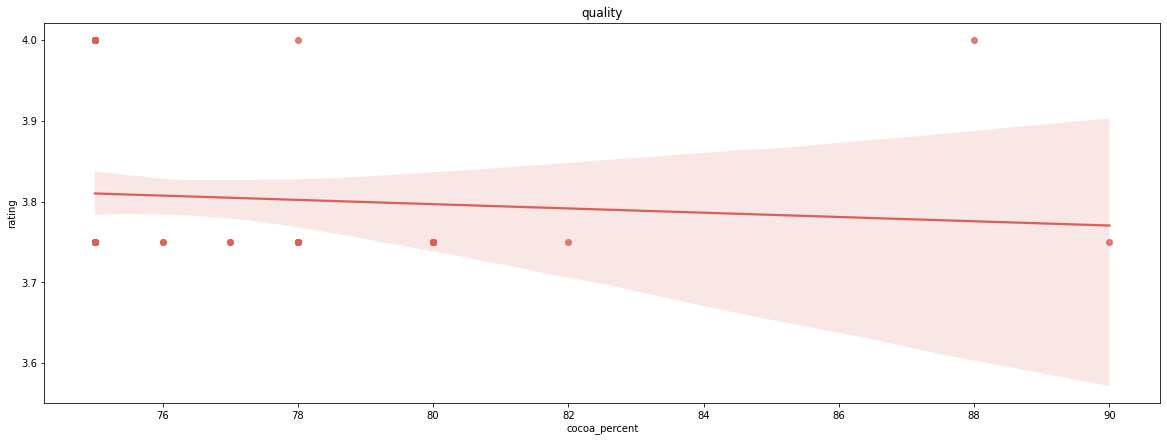

In [75]:
#visualizing the chocolate bars with both criteria
plt.figure(figsize=(20,7))
plt.title('quality')
sns.regplot(x= 'cocoa_percent', y= 'rating', data=cbf)

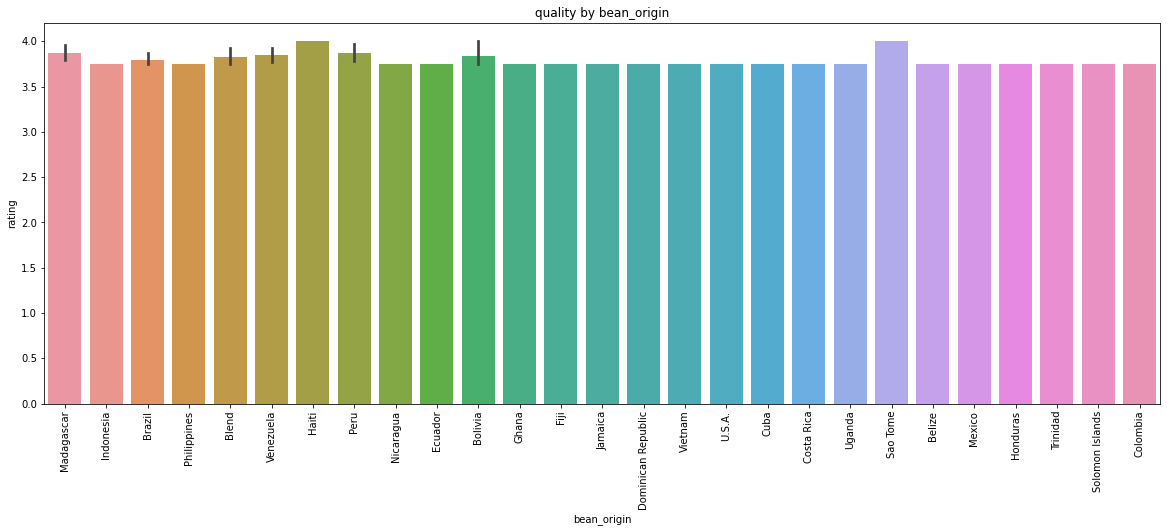

In [44]:
plt.figure(figsize=(20,7))
plt.title('quality by bean_origin')
sns.barplot(x= cbf['bean_origin'], y= cbf['rating'])
plt.xticks(rotation=90);

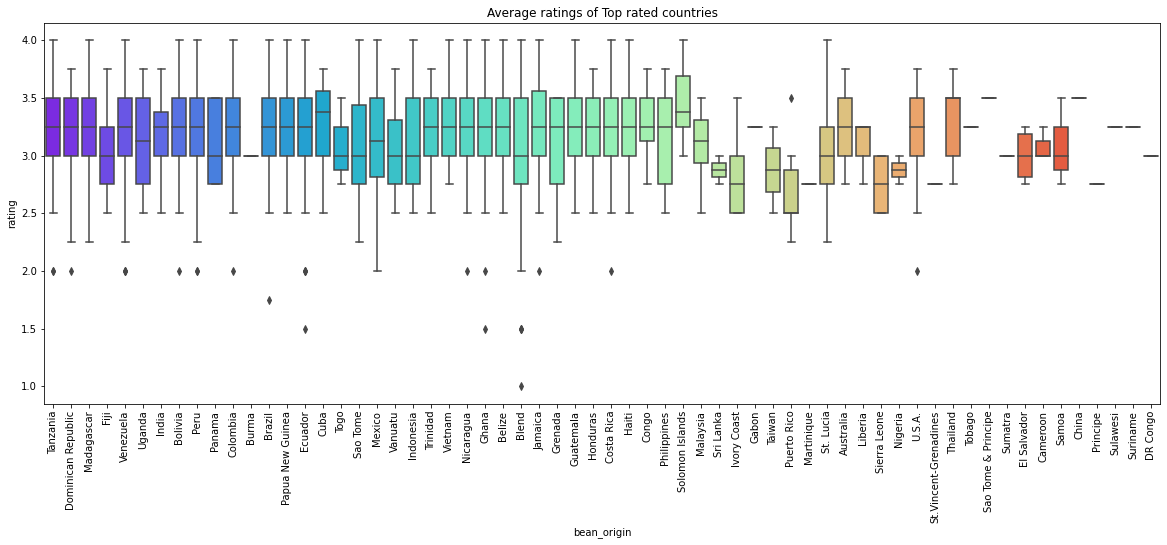

In [69]:
plt.figure(figsize=(20,7))
plt.title('Average ratings of Top rated countries')
sns.boxplot(x='bean_origin', y='rating', data=cb2, palette= 'rainbow')
plt.xticks(rotation=90);

From this visualization above, especially the scatter plot,it shows an insignificant level of correlation which depicts that both variables can be used independent of eachother and that the higher the cocoa percent,the more the quality of the chocolate bars and it was also  rated higher as such

In [71]:
#from the '.describe' above, it was evident that bean origin 'venezuela' was the most common bean origin hence it is just
#reasonable to check it straight to check if the bean origin defines the quality

cbv= cb2[cb2.bean_origin== 'Venezuela']
cbv

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.0,"B,S,C,L","oily, nut, caramel, raspberry",4.00
1315,A. Morin,France,2014,Venezuela,"Carenero, Criollo",70.0,4.0,"B,S,C,L","harsh, leather, earthy",2.75
1315,A. Morin,France,2014,Venezuela,"Sur del Lago, Criollo",70.0,4.0,"B,S,C,L","nutty, mild choco, roasty",3.50
1319,A. Morin,France,2014,Venezuela,"Puerto Cabello, Criollo",70.0,4.0,"B,S,C,L","astringent, nutty, chocolatey",3.75
...,...,...,...,...,...,...,...,...,...,...
457,Willie's Cacao,U.K.,2009,Venezuela,Rio Caribe,72.0,3.0,"B,S,C","creamy, earthy, nutty",3.25
593,Willie's Cacao,U.K.,2010,Venezuela,Hacienda Las Trincheras,72.0,3.0,"B,S,C","dry, nutty, cocoa",3.50
1912,Wm,U.S.A.,2016,Venezuela,"Guasare, Zulia Prov., 2015, batch 124",74.0,3.0,"B,S,C","nutty, rubber",3.00


In [72]:
#to get the information regarding the chocolate bars from Venezuela
cbv.describe()

,year_reviewed,cocoa_percent,num_ingredients,rating
count,246.000000,246.000000,246.000000,246.000000
mean,2012.756098,71.762195,3.162602,3.239837
std,3.823326,4.507290,0.946521,0.458923
min,2006.000000,58.000000,2.000000,2.000000
25%,2010.000000,70.000000,2.000000,3.000000
50%,2013.000000,70.000000,3.000000,3.250000
75%,2015.000000,75.000000,4.000000,3.500000
max,2021.000000,91.000000,5.000000,4.000000


From this table above, it is evident that bean origin doesnt define the quality of the chocolate bars because if it does, it would be expected that the maximum cocoa percent will be 100 which is the maximum of the whole data but this isnt the case

In [70]:
#5b; The average cocoa content from chocolate bars with higher ratings (ratings> 3.5) is 70.996 as shown below
cbr.describe()

,year_reviewed,cocoa_percent,num_ingredients,rating
count,406.000000,406.000000,406.000000,406.000000
mean,2014.073892,70.996305,3.029557,3.818350
std,3.991900,3.597065,0.880019,0.111563
min,2006.000000,50.000000,2.000000,3.750000
25%,2011.000000,70.000000,2.000000,3.750000
50%,2014.000000,70.000000,3.000000,3.750000
75%,2017.000000,72.000000,3.000000,4.000000
max,2021.000000,90.000000,5.000000,4.000000


In [73]:
#6;Comparethe average rating of bars with and without lecithin
#first we call out the unique ingredients then proceed to separate those with lecithin from those without

cb2.ingredients.unique()

array(['B,S,C', 'B,S,C,L', 'B,S', 'B,S,C,V', 'B,S,C,V,L', 'B,S,C,V,L,Sa',
       'B,S,C,V,Sa', 'B,S,V,L', 'B,S*', 'B', 'B,S*,C', 'B,S,L', 'B,S,V',
       'B,S*,C,L', 'B,S*,C,Sa', 'B,S*,Sa', 'B,S,C,Sa', 'B,S*,V,L', 'B,C',
       'B,S*,C,V', 'B,S,C,L,Sa'], dtype=object)

In [59]:
#lets call out those with lecithin using the 'isin' command

cbl= cb2.loc[
    (cb2.ingredients.isin(['B,S,C,L', 'B,S,C,V,L', 'B,S,C,V,L,SA', 'B,S,V,L', 'B,S,L', 'B,S*,C,L', 'B,S*,V,L', 'B,S,C,L,Sa']))
]
cbl

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75
1015,A. Morin,France,2013,Colombia,Colombie,70.0,4.0,"B,S,C,L","burnt rubber,alkalyzed notes",2.75
1011,A. Morin,France,2013,Madagascar,"Madagascar, Criollo",70.0,4.0,"B,S,C,L","sticky, red fruit, sour",3.00
...,...,...,...,...,...,...,...,...,...,...
697,Zokoko,Australia,2011,Bolivia,Alto Beni,68.0,4.0,"B,S,C,L","oily, honey, light rum",3.50
701,Zokoko,Australia,2011,Papua New Guinea,Tokiala,66.0,4.0,"B,S,C,L","toffee, caramel, butterscotch",3.50
701,Zokoko,Australia,2011,Bolivia,"Tranquilidad, Baures",72.0,4.0,"B,S,C,L",intense prune and berry,3.75


In [60]:
#to see the average rating of chocolate bars with lecithin 
cbl.describe()

,year_reviewed,cocoa_percent,num_ingredients,rating
count,489.000000,489.000000,489.000000,489.000000
mean,2012.274029,69.945808,4.361963,3.152352
std,4.277582,6.179987,0.514010,0.486813
min,2006.000000,42.000000,3.000000,1.000000
25%,2009.000000,66.000000,4.000000,2.750000
50%,2012.000000,70.000000,4.000000,3.250000
75%,2015.000000,74.000000,5.000000,3.500000
max,2021.000000,91.000000,5.000000,4.000000


In [61]:
# ectracting the chocolate bars without lecithin
cbnl= cb2.loc[
    (cb2.ingredients.isin(['B,S,C', 'B,S', 'B,S,C,V', 'B,S,C,V,SA', 'B,S*', 'B', 'B,S*,C', 'B,S,V', 'B,S*,C,Sa', 'B,S*,Sa' 'B,S,C,Sa', 'B,C', 'B,S*,C,V']))
]
cbnl

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00


In [62]:
#To check the average rating of chocolate bars without lecithin
cbnl.describe()

,year_reviewed,cocoa_percent,num_ingredients,rating
count,1938.000000,1938.000000,1938.000000,1938.000000
mean,2015.051600,71.887513,2.693498,3.227038
std,3.680506,4.786860,0.626360,0.411253
min,2006.000000,55.000000,1.000000,1.500000
25%,2012.000000,70.000000,2.000000,3.000000
50%,2015.000000,70.000000,3.000000,3.250000
75%,2018.000000,74.000000,3.000000,3.500000
max,2021.000000,100.000000,4.000000,4.000000


In summary, chocolate bars without lecithin was rated higher than those with lecithin. It means people really preferred their chocolate bars without lecithin
Another insight is that bean origin does not define the quality of the chocolate bars, the cocoa perceunt does and thus the ratings.